# Deep Learning

## HW1- Problem 3 - Regression (100 pts)

### Please fill this part


1.   Full Name: Mehran Morabi Pazoki
2.   Student Number: 400201661


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [2]:
# You are not allowed to import other packages.

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

### Part1:
Consider the dataset which has been given to you. Split the dataset into the `training dataset` and `test dataset`. You can use `80%` of the data for training and the rest for testing.

In [3]:
dataset = pd.read_csv("./data/data01.csv")

# implement the split part
# name them: x_train, x_test, y_train, y_test
TotLength=len(dataset)
indexes=np.arange(500)
np.random.shuffle(indexes)
train_idx=indexes[0:int(0.8*TotLength)]
test_idx=indexes[int(0.8*TotLength):TotLength]


x_train = np.array(dataset['X'][train_idx])
y_train = np.array(dataset['Y'][train_idx])

x_test = np.array(dataset['X'][test_idx])
y_test = np.array(dataset['Y'][test_idx])

### Part2:
Assume there is simple linear relationship between X and Y. Train a simple `Linear Regression` on the training dataset and report its accuracy on the training and testing dataset, separately.

In [4]:
# here you can implement via sgd or use least square solution. we suggest the second one inv(A^T A) * A^T y.
# consider m as the returned line --> m[0] = the slope , m[1] = y intercept, also don't forget to use numpy for calculating m.
A=np.concatenate((x_train.reshape(-1,1),np.ones_like(x_train).reshape(-1,1)),axis=1)
y=y_train.reshape(-1,1)
m = np.dot(np.dot(np.linalg.inv(np.dot(A.T,A)),A.T),y)

In [5]:
m

array([[-0.98381916],
       [ 0.79090434]])

In [6]:
predicted_train_y = m[0] * x_train + m[1]
predicted_test_y = m[0] * x_test + m[1]

# train_error = np.dot((y_train-predicted_train_y).T,y_train-predicted_train_y)/(0.8*TotLength)
# test_error = np.dot((y_test-predicted_test_y).T,y_test-predicted_test_y)/(0.2*TotLength)
train_error=mean_squared_error(y_train,predicted_train_y)
test_error=mean_squared_error(y_test,predicted_test_y)


print(f"MSE train error: {train_error}\nMSE test error: {test_error}")

MSE train error: 0.32133831656561446
MSE test error: 0.3701661690911338


### Part3:
Draw the line you've found in the last part, on train and test points (each separately).

Text(0.5, 1.0, 'Train dataset')

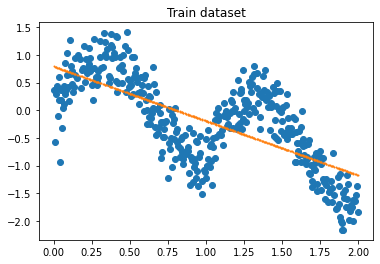

In [7]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, m[0]*x_train + m[1], s=1)
plt.title("Train dataset")

Text(0.5, 1.0, 'Test dataset')

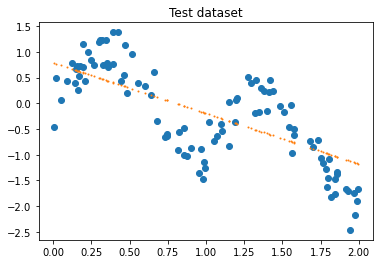

In [8]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, m[0]*x_test + m[1], s=1)
plt.title("Test dataset")

### Part4:
Were the reported accuracies acceptable?

What about the line you drew in the last part?

Was it appropriate for the dataset?
<br><br/>
Explain what are the main problems here.

از مقادیر تابع هزینه مدل نتوانسته تخیمن خوبی از ورودی حتی برای داده های آموزش داشته باشد به همین  علت 
این دو هزینه تقریبا با یکدیگر برابر هستند در صورتی که انتظار داشتیم در حالت عادی مقدار تابع هزینه برای آموزش  خیلی کمتر از داده تست باشد
در این حالت اصطلاح آندرفیت استفاده میشود
همان طور که پیداست مدل بیش از حد ساده بوده و نمیتواند حالت سیسنوسی داده هارا دنبال کند یعنی باید ویژگی های بیشتری را برای آموزش در نظر گرفت تا بتواند حالت غیر خطی این دیتا ست را دنبال کندکه این کار موجب افزایش پارامتر های آموزش نیز میشود بنابراین مدل خطی   مناسب برای این دیتا ست نخواهد بود


### Part5:
Now, consider the `Locally Weighted Linear Regression` approach for this problem. Do expect it performs better than simple `Linear Regression` for this dataset?

در این روش در واقع فاز آموزش به صورت جداگانه وجود نخواهد داشت و همه چیز در زمان تست محاسبه میشود روش به این صورت است که به داده های پیرامون داده تست یک وزن داده میشود که هرچه به داده تست نزدیک تر باشند وزن بیشری خواهند داشت و هرچه دورتر باشند وزن کمتری به خود می گیرند به همین علت به صورت محلی انگار رگرسیون خطی انجام میشود و نتیجه بهتری به لحاظ دقت خواهد داشت چون انگار این روش منحنی را به تعداد زیادی خط تقسیم میکند و میتواند توصیف بهتری از دیتاست داشته باشد البته به علت محاسبه ماتریس وزن برای هر یک از داده های تست به لحاظ محاسباتی غیر بهینه خواهد بود 

### Part6:
Here, we want to implement the `suggested model`. You can implement any weight function you want, the below implementation is just a sample:
<br><br/>
\begin{equation*}
    w^{(i)}=exp\left(-\frac{(\mathbf x^{(i)}-\mathbf x)^\top(\mathbf x^{(i)}-\mathbf x)}{2\tau^2}\right)
\end{equation*}

In [9]:
def get_weight_matrix(the_query_point, train_dataset, hyperparameter):
    l = train_dataset.shape[0]
    
    # W = np.mat(np.eye(l))
    # for i, xi in enumerate(train_dataset):
    #     W[i, i] = np.exp(-1*np.dot((xi-the_query_point).T,(xi-the_query_point))/(2*hyperparameter**2))
    W=np.diag(np.diag(np.exp(-1*np.dot((train_dataset-the_query_point),(train_dataset-the_query_point).T)/(2*hyperparameter**2))))
    return W

Now implement the `closed form solution` based on the following formula:
<br><br/>
\begin{equation*}
    \boldsymbol\theta=(X^\top WX)^{-1}(X^\top WY)
\end{equation*}
<br><br/>
Of course if you use another form, implement your own.

In [10]:
def predict(train_X, train_Y, query_x, hyperparameter):
    l = train_X.shape[0]
    X = np.hstack((x_train.reshape(-1,1), np.ones((l, 1))))
    qx = np.mat([query_x, 1])
    W = get_weight_matrix(qx, X, hyperparameter)
    theta = np.dot(np.linalg.inv(np.dot(np.dot(X.T,W),X)),np.dot(np.dot(X.T,W),train_Y))

    return np.dot(qx, theta)

### Part7:
Report accuracy of this model on the test dataset. Also, draw a plot that contains (x_test, y_test) pairs and (x_test, predicted_y) pairs that differ in color.

In [42]:
predicted_test = [predict(x_train, y_train, query, hyperparameter=0.1) for query in x_test]
# error = np.dot((predicted_test-y_test).T,(predicted_test-y_test))/(len(y_test))
error = mean_squared_error(y_test,np.array(predicted_test)[:,0,0])
print(f"MSE test error: {error}")

MSE test error: 0.09592753239137931


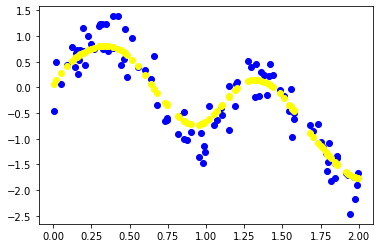

In [12]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_test, c="yellow")

### Part8:
Is the performance of the new model better than the previous one? `Explain`.

بله این روش همان طور که قبلا نیز در قسمت پنجم توضیح داده شد نتیجه بهتری داده چون با تنظیم هایپر پارامتر مربوطه میزان 
محلی بودن را میتوان افزایش یا کاهش داد که با زیاد کردن این پارامتر تقریبا ماتریس  وزن به سمت ماتریس همانی میل کرده و نتیجه مثل 
رگرسیون خطی ساده خواهد بود ولی با کم کردن این مقدار میزان محلی بودن نیز افزایش مییابد و قادر خواهد بود تغییرات نمودار را بهتر دنبال کند این 
بدین دلیل است که مقدار قطر اصلی ماتریس وزن ها برای نمونه ها نزدیک تقریبا یک و برای نمونه ها دور به صفر میل میکند

### Part9:
Now, we want to consider the `KNN` approach for this problem; Do you think it will perform well?

این الگوریتم نیز مانند رگرسیون خطی باوزن های محلی یک الگوریتم محلی بوده با این تفاوت که هربار برای پیشبینی مقدار مورد نظر باید 
براساس فاصله نزدیک نقاط در داده های آموزش را در نظر بگیریم که تعداد آن یک فرا پارامتر بوده وبین این داده های نزدیک میانگین میگیریم
براین اساس اگر مقدار فراپارامتر را کمترین عدد یعنی یک بگیریم تابع حاصل به صورت پله ای خواهد شد و اگر این مقدار را خیلی زیاد بگیریم 
به سمت میانگین داده ها میل خواهد کرد بنابراین با تنظیم این پارامتر میزان پیچیدگی مدل نیز تغییر خواهد نمود برای این مثال خاص  با تنظیم 
مناسب میتوان دقت خوبی بدست آورد

### Part10:
Implementing the `KNN model`.

In [13]:
from turtle import distance


class KNN:
    def __init__(self, number_neighbours, X, Y):
        self.k = number_neighbours
        self.X = X
        self.Y = Y

    def distance(self, x1):#, x2
        distance = np.sqrt((self.X-x1)**2) # implement the distance function
        return distance

    def return_nn_ids(self, x):
        indexes=np.arange(len(self.X))
        dist=self.distance(x)
        indices = [idx for _,idx in sorted(zip(dist,indexes))] # find indices of k nearest neighbours to x
        return indices[0:self.k]

    def predict(self, x):
        neareest_indices = self.return_nn_ids(x)
        predicted_y = np.mean(self.Y[neareest_indices])
        return predicted_y

In [14]:
def evaluation(k, x_train, y_train, x_test, y_test):
    model = KNN(k, x_train, y_train)
    predicted_y = [model.predict(x) for x in x_test]
    error = mean_squared_error(y_test,predicted_y)
    return error, predicted_y

In [46]:
k = 5
error_knn, predicted_y = evaluation(k, x_train, y_train, x_test, y_test)
print(f"MSE error of KNN for test dataset: {error_knn}")

MSE error of KNN for test dataset: 0.0845554150389432


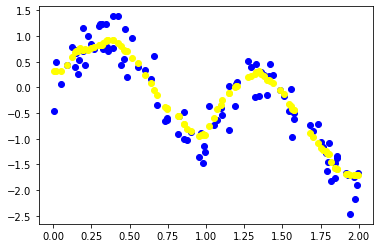

In [39]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_y, c="yellow")

min error occure in K =  20


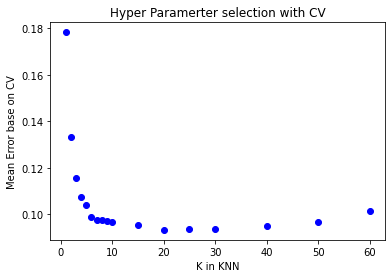

In [43]:
tot_index=np.arange(len(dataset))
L=int(len(dataset)/10)
np.random.shuffle(tot_index)
k = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,40,50,60]
y_cv=[]
for K in k:
    y=0
    for i in range(10):
        test_idx=tot_index[L*i:L*i+L]
        train_idx=np.array(list(set(tot_index)-set(test_idx)))
        cv_x_test=np.array(dataset['X'][test_idx])
        cv_y_test=np.array(dataset['Y'][test_idx])
        cv_x_train=np.array(dataset['X'][train_idx])
        cv_y_train=np.array(dataset['Y'][train_idx])
        error_knn, _ = evaluation(K, cv_x_train, cv_y_train, cv_x_test, cv_y_test)
        y+=error_knn
    y_cv.append(y/10)
plt.scatter(k, y_cv, c="blue")
plt.title("Hyper Paramerter selection with CV")
plt.xlabel('K in KNN')
plt.ylabel('Mean Error base on CV')
print("min error occure in K = ",[K for _,K in sorted(zip(y_cv,k))][0])

To find best K for this algorithm we suggest to use cross-validation.
<br><br/>
Did this model perform well (due to the plot and test accuracy)?

بله با توجه به نتایج بدست آمده و با استفاده از تکنیک "کراس ولیدیشن" به میزان بهترین فراپارامتر برای این تکنیک 
دست پیدا کرده ایم که به صورت نمودار برای چندین مقدار رسم شده استکه میزان خطا حتی از روش رگرسیون خطی محلی  نیز نتایج بهتری بدست آمده است